In [1]:
from hdf5storage import loadmat, savemat
import numpy as np
import pickle

In [2]:
kn = loadmat('/home/tailai/data/knapsack/runB/kn_1_3_allneg_60_6_3.mat')
items = kn['items'][160]
n_con = kn['n_con'] 
n_items = kn['n_items'] 
n_obj = kn['n_obj'] 
n_selected = kn['n_selected'] 
capacity = kn['capacity']

In [3]:
rng = np.random.RandomState(123)
pop_size = 5000

In [4]:
def best_ratio_item(items, obj_to_max):
    ratios = items[:, obj_to_max] / items[:, -1]
    sort_indices = np.argsort(ratios)
    best_item_index = sort_indices[-1]
    return best_item_index

In [5]:
pop_count = 0
population = np.zeros((pop_size, n_selected), dtype=np.int32)
objectives = np.zeros((pop_size, n_obj))
while pop_count < pop_size:
    remain_ind = np.arange(n_items)
    knapsack_indices = np.zeros(n_selected, dtype=int)    
    knapsack = np.zeros((n_selected, (n_obj+n_con)))
    for n in range(0, n_selected):
        current_items = items[remain_ind, :]
        obj_to_max = rng.randint(n_obj) 
        choice_ind = best_ratio_item(current_items, obj_to_max)
        choice_ind_ori = remain_ind[choice_ind]
        knapsack_indices[n] = choice_ind_ori
        knapsack[n, :] = items[choice_ind_ori, :]
        remain_ind = np.delete(remain_ind, choice_ind) 
    
    constraint = np.sum(items[knapsack_indices, -1])
    if constraint <= capacity:
        population[pop_count, :] = knapsack_indices
        objectives[pop_count, :] = np.sum(knapsack[:, :n_obj], axis=0)
        pop_count += 1

In [6]:
objectives_unique = np.unique(objectives, axis=0)

In [10]:
with open('new_results_cond_uni_base_1_3.pkl', 'rb') as f:
    results = pickle.load(f)

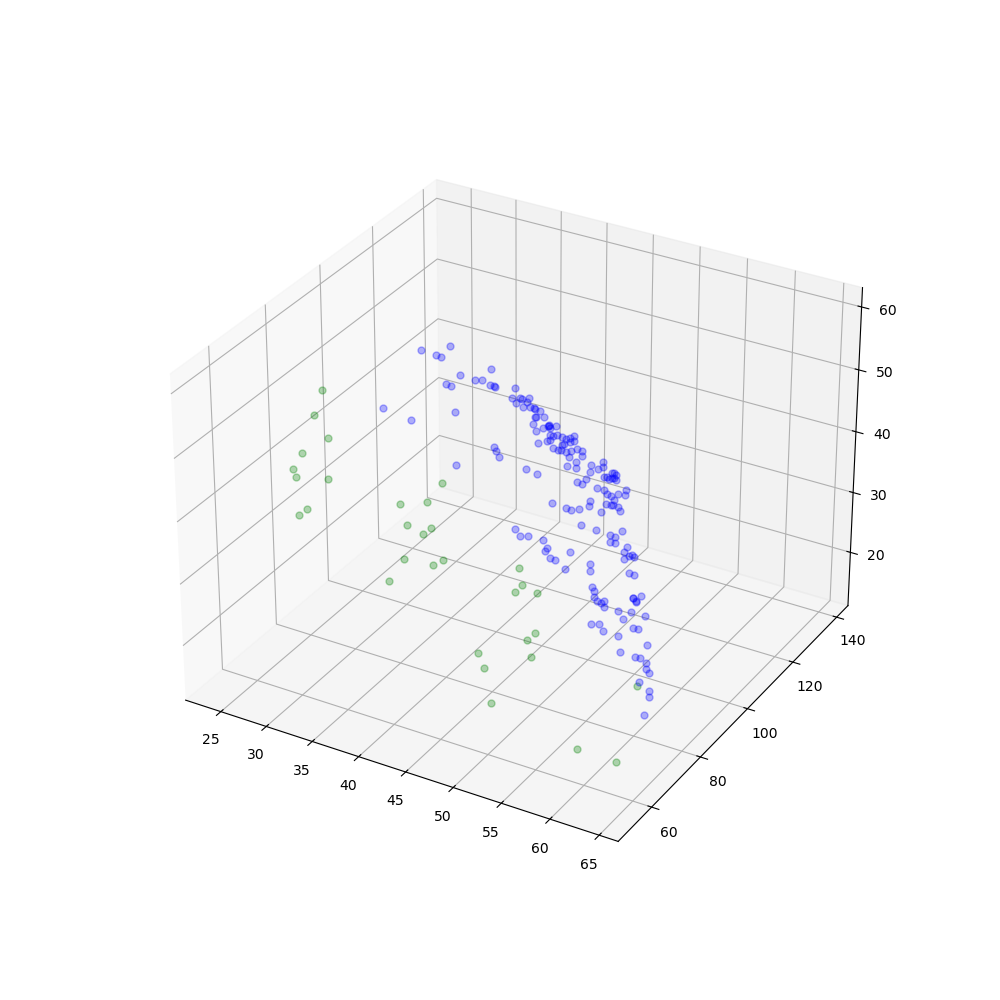

In [11]:
from matplotlib import pyplot as plt
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(objectives_unique[:,0], objectives_unique[:,1], objectives_unique[:,2], 'go', alpha=0.3, markersize=5)
ax.plot(results['converged_pf_table'][-1][:,0], results['converged_pf_table'][-1][:,1], results['converged_pf_table'][-1][:,2], 'bo', alpha=0.3, markersize=5)
plt.show()